In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {0:1,1:0}
dados['finished'] = dados.unfinished.map(troca)

x = dados[['expected_hours','price']]
y = dados['finished']

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

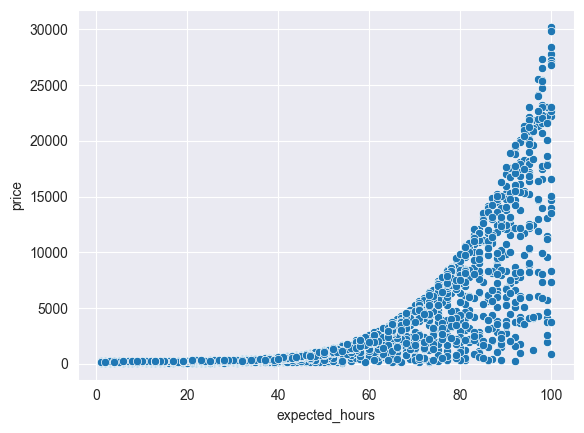

In [4]:
sns.scatterplot(x='expected_hours',y='price',data=dados)

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

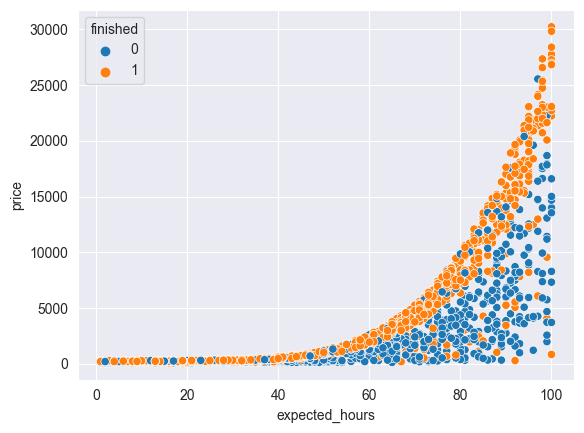

In [5]:
sns.scatterplot(x='expected_hours',y='price',hue='finished',data=dados)

In [15]:
seed = 42
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
from sklearn.svm import SVC

modelo = SVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {round(accuracy_score(y_test, previsoes), 2) * 100}%')

Acurácia do modelo: 56.99999999999999%


C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


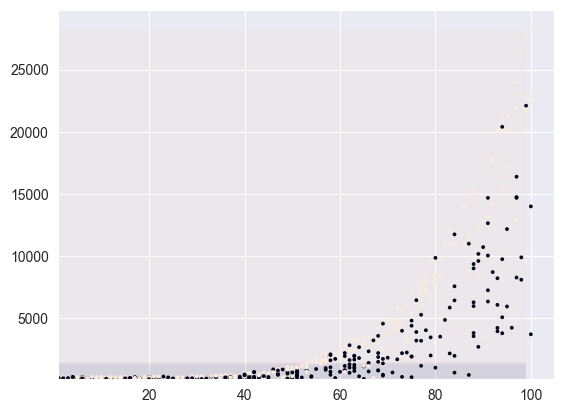

In [16]:
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(x_axis, y_axis)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.1)
plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=3)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 42
np.random.seed(seed)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


scaler =  StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

modelo = SVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {round(accuracy_score(y_test, previsoes), 2) * 100}%')

Acurácia do modelo: 68.0%


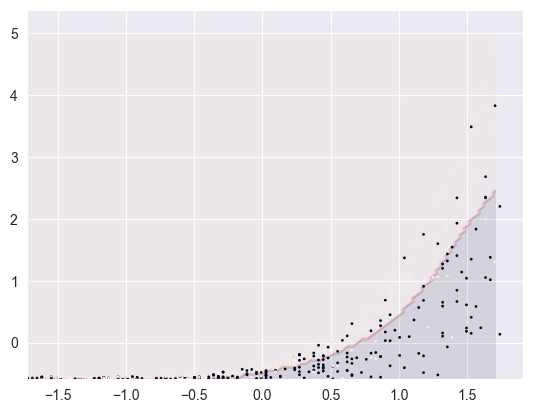

In [24]:
data_x = X_test[:,0]
data_y = X_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(x_axis, y_axis)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.1)
plt.scatter(data_x, data_y, c=y_test, s=1)